In [7]:
import pandas as pd #manejo y analisis de estructuras de datos 
import numpy as np #calculo numerico y analisis de datos 
import seaborn as sns #creacion de  graficos estadisiticos
import matplotlib.pyplot as plt #creacion de  graficos en 2 dimensiones

#librerias para  imprementar  modelos de ciencia de datos
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
Datos = pd.read_csv('C:/Users/PC/Desktop/data/Anexo 3 - Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv')
Datos.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [13]:
Datos.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [21]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [23]:
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [83]:
# porcentaje de datos para  entrenamiento (train) = 75%, y para prueba (test) = 25%

#se crean variables  X e Y para almacenar la informacion del entrenamiento

X = Datos.drop('condition',axis=1) # se  cargan los datos de train sin los datos de la columna diabetico
Y = Datos['condition'] # se cargan los datos de train con los datos d ela columna diabetico

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,stratify=Y,random_state =0)

In [85]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [87]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [89]:
#construir el modelo de regresion logistica

modelo_regresion = LogisticRegression(solver = "liblinear") # libilinear  es una  libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit(X_train,Y_train)

#crea el modelo de  prediccion
Prediccion = modelo_regresion.predict(X_test) # la funcion predict predice los valores a partir del conjunto de datos de validacion

In [91]:
print(Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [93]:
print(Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [95]:
print(metrics.classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



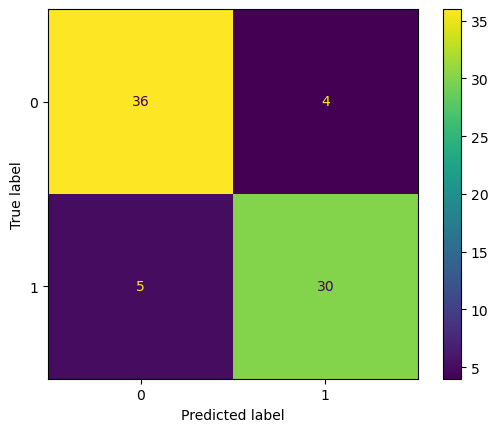

In [97]:
cm=metrics.confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

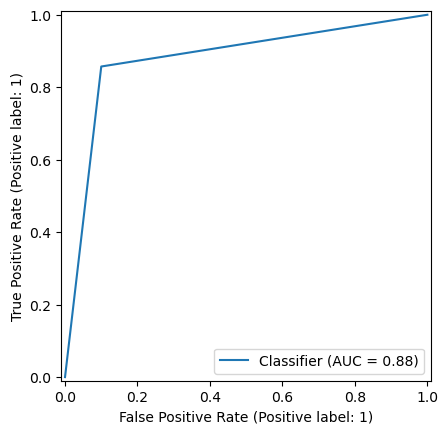

In [99]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()


## del desempeño del modelo se puede describir:

* Presicion:Presicion mide la proporcion de predicicones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo.Aqui la precicion para la clase "condicion" es de 0.88, lo que significa que el 88% de los predichos como personas con problemas del corazon por el modelo eran en realidad personas con problemas del corazon.
* Recall: mide la proporcion de predicciones positivas verdaderas entre todas las instancias positivasreales en el conjunto de datos. Aqui en el recall para laclase diabetico es 0.86, lo que indica que el modelo identifico correctamente al 86% de todos los diabeticos
* F1 score: es la media armonica de precision y recuperacion. Proporciona una puntuaicon unica que equilibra la precicion y Recall. Aqui la puntuacion F1 para la clase "diabetica" es 0.81 lo que indica un equilibrio entre precicion y recuerdo

De la matrix de confucion podemos interpretar:

* Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falto: 36
* verdaderos positivos: el recuento de obserbaciones que un clasificador predijo correctamente como verdadero: 30
* Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdadreras: 4
* Falsos negativos:el recuento de observaciones que un clasificador predijo incorrectamente como falso: 5
* De la curva de precision del modelo se puede interpretar El AUC es 0.88 lo que significa que el 88% de las predicciones del clasificador son correctas en todos los umbrales de clasificacion.